In [2]:
import numpy as np  
import time  
import cProfile
import matplotlib.pyplot as plt
import struct


# Zadanie 1

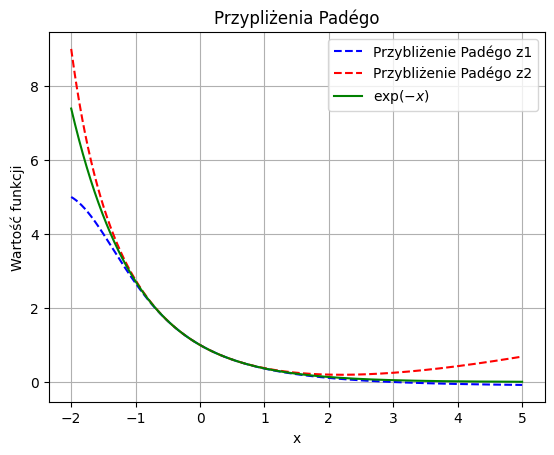

In [3]:
def z1(x):
    return (6-2*x)/(6+4*x+x**2)

def z2(x):
    return (6-4*x+x**2)/(6+2*x)

y = np.arange(-2, 5, 0.0001)
z1 = z1(y)
z2 = z2(y)
z = np.exp(-y)

plt.plot(y, z1, 'b--',  label='Przybliżenie Padégo z1')
plt.plot(y, z2, 'r--', label='Przybliżenie Padégo z2')
plt.plot(y, z, 'g', label=r'$\exp (-x)$')
plt.title('Przypliżenia Padégo')
plt.xlabel('x')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.savefig('pady1.png')
plt.grid(True)
plt.show()

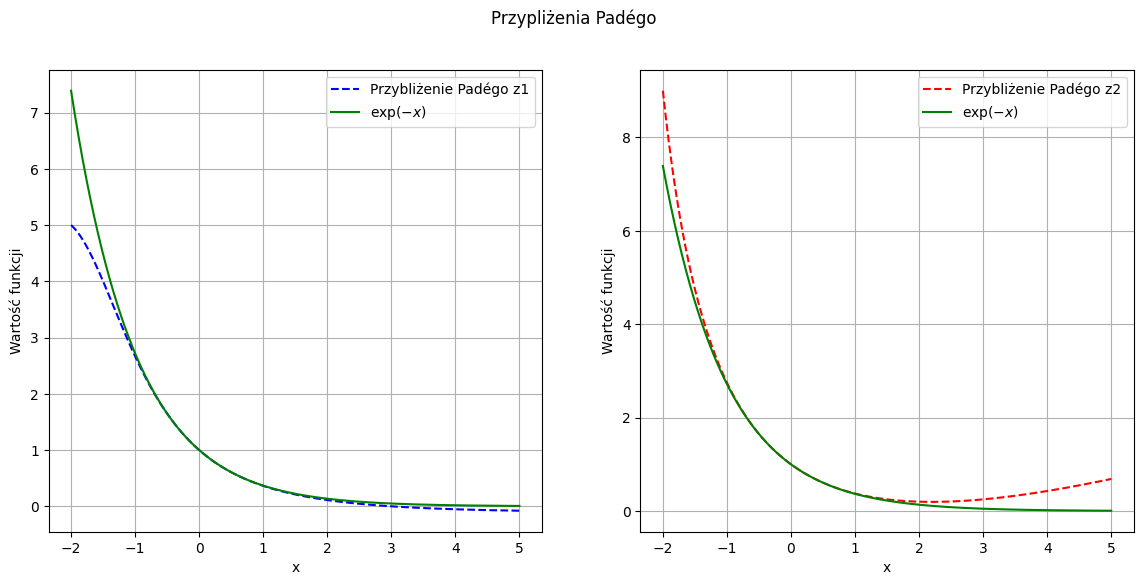

In [4]:
plt.figure(figsize=(14, 6))
plt.suptitle('Przypliżenia Padégo')
plt.subplot(1,2,1)
plt.plot(y, z1, 'b--',  label='Przybliżenie Padégo z1')
plt.plot(y, z, 'g', label=r'$\exp (-x)$')
plt.xlabel('x')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(y, z2, 'r--',  label='Przybliżenie Padégo z2')
plt.plot(y, z, 'g', label=r'$\exp (-x)$')
plt.xlabel('x')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.savefig('pady2.png')
plt.grid(True)
plt.show()

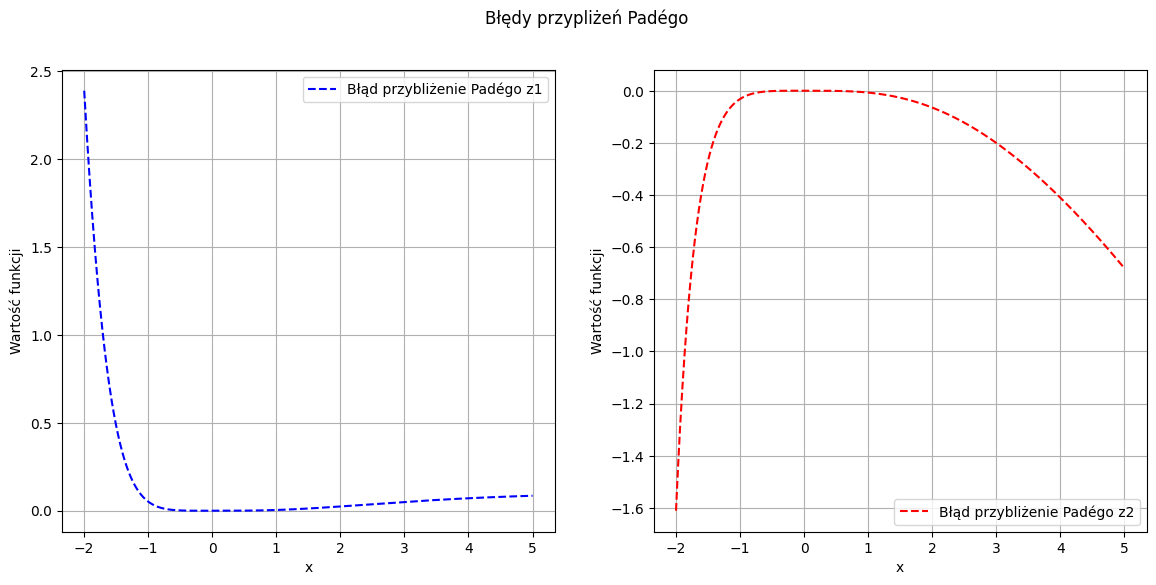

In [5]:
error_z1 = z - z1
error_z2 = z - z2

plt.figure(figsize=(14, 6))
plt.suptitle('Błędy przypliżeń Padégo')
plt.subplot(1,2,1)
plt.plot(y, error_z1, 'b--',  label='Błąd przybliżenie Padégo z1')
plt.xlabel('x')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(y, error_z2, 'r--',  label='Błąd przybliżenie Padégo z2')
plt.xlabel('x')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.savefig('pady3.png')
plt.grid(True)
plt.show()

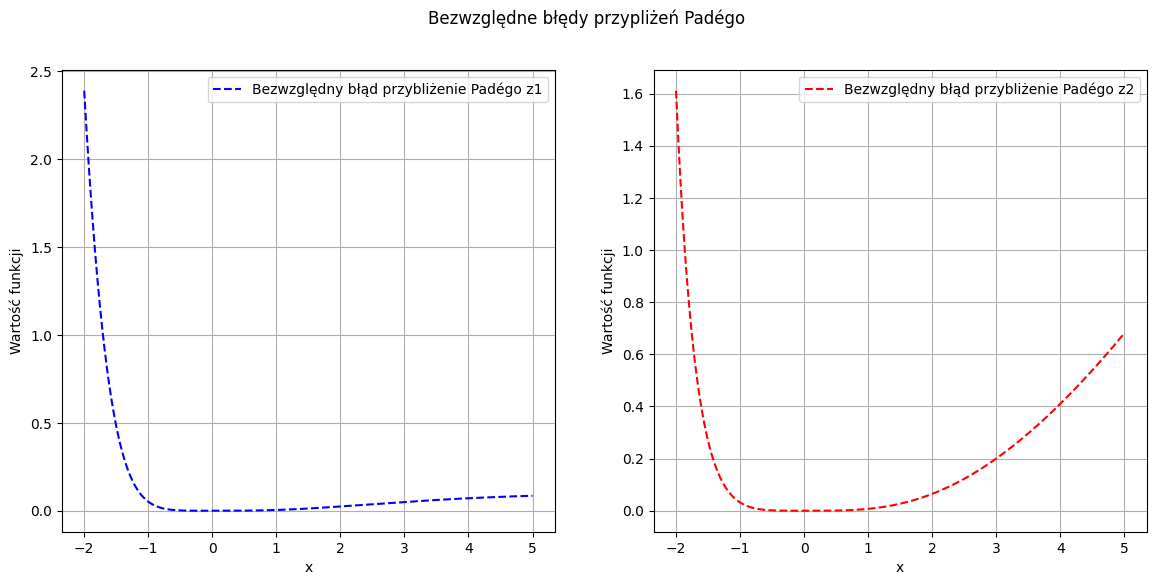

In [6]:
error_z1_abs = abs(z - z1)
error_z2_abs = abs(z - z2)

plt.figure(figsize=(14, 6))
plt.suptitle('Bezwzględne błędy przypliżeń Padégo')
plt.subplot(1,2,1)
plt.plot(y, error_z1_abs, 'b--',  label='Bezwzględny błąd przybliżenie Padégo z1')
plt.xlabel('x')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.grid(True)

plt.subplot(1,2,2)
plt.plot(y, error_z2_abs, 'r--',  label='Bezwzględny błąd przybliżenie Padégo z2')
plt.xlabel('x')
plt.ylabel('Wartość funkcji')
plt.legend()
plt.savefig('pady4.png')
plt.grid(True)
plt.show()

# Zadanie 2

In [7]:
'Dokładność maszynowa to najmniejsza liczba, która może zostać dodana do liczby 1, aby wynik był różny od 1.'
print(np.finfo(float).eps)

epsilon = 1

while 1 + epsilon != 1:
    epsilon = epsilon/2

epsilon = epsilon*2

print('Dokładność maszynowa na tym komputerze wynosi: ', epsilon)


2.220446049250313e-16
Dokładność maszynowa na tym komputerze wynosi:  2.220446049250313e-16


In [8]:
'Jest to największa liczba nieujemna, której dodanie do jedności daje wynik równy 1.'
epsilon = 1

while 1 + epsilon != 1:
    epsilon = epsilon/2

print('Dokładność maszynowa na tym komputerze wynosi: ', epsilon)

Dokładność maszynowa na tym komputerze wynosi:  1.1102230246251565e-16


# Zadanie 3

In [9]:
x = 7/100 * 100 - 7
print(x)
"W językach programowania używających arytmetyki zmiennoprzecinkowej, takich jak Python, możemy napotkać błąd reprezentacji liczb zmiennoprzecinkowych."

for i in range(1, 51):
    result = i / 100 * 100 - i
    if result != 0:
        print(f"Number {i} generates wrong result: {result}")

8.881784197001252e-16
Number 7 generates wrong result: 8.881784197001252e-16
Number 14 generates wrong result: 1.7763568394002505e-15
Number 28 generates wrong result: 3.552713678800501e-15
Number 29 generates wrong result: -3.552713678800501e-15


# Zadanie 4

In [10]:
# Podane bity IEEE 754 (float32)
bits = "0 01111111 10110011001100110011001"
bits = bits.replace(" ", "") # usuń spacje

# Ręczna konwersja bitów do wartości float
z = int(bits[0], 2)
c = int(bits[1:9], 2)
mantysa_bits = bits[9:]
m = 1 + int(mantysa_bits, 2) / (2**23)
e = c - 127
manual_result = ((-1)**z) * m * (2**e)

# Zamiana bitów na liczbę float za pomocą struct
as_int = int(bits, 2)
as_bytes = struct.pack('>I', as_int)
value = struct.unpack('>f', as_bytes)[0]

# Obliczenie błędów
true_value = 1.7
abs_error_manual = abs(true_value - manual_result)
rel_error_manual = abs_error_manual / true_value

abs_error_struct = abs(true_value - value)
rel_error_struct = abs_error_struct / true_value

# Wyniki
print(f"Reprezentacja IEEE 754: {bits}")
print(f"Wartość obliczona ręcznie: {manual_result:.10f}")
print(f"Wartość z IEEE 754 (struktura): {value:.10f}")
print(f"Błąd bezwzględny (ręczny): {abs_error_manual:.10e}")
print(f"Błąd względny (ręczny): {rel_error_manual:.10e}")
print(f"Błąd bezwzględny (struktura): {abs_error_struct:.10e}")
print(f"Błąd względny (struktura): {rel_error_struct:.10e}")


Reprezentacja IEEE 754: 00111111110110011001100110011001
Wartość obliczona ręcznie: 1.6999999285
Wartość z IEEE 754 (struktura): 1.6999999285
Błąd bezwzględny (ręczny): 7.1525573686e-08
Błąd względny (ręczny): 4.2073866874e-08
Błąd bezwzględny (struktura): 7.1525573686e-08
Błąd względny (struktura): 4.2073866874e-08


# Zadanie 5 + 6

Czas wykonania obliczeń: 0.45807671546936035 sekundy


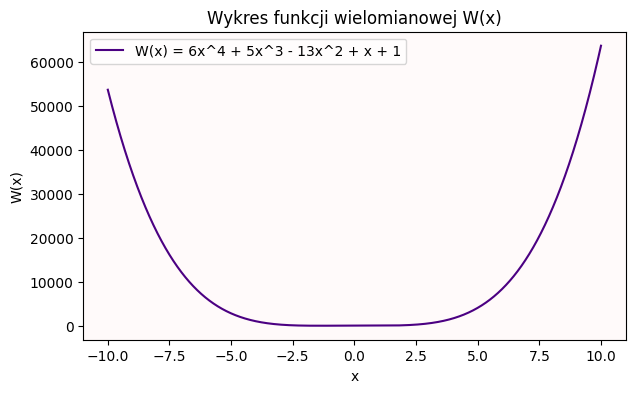

         1043430 function calls (1036411 primitive calls) in 1.979 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
   200000    0.330    0.000    0.330    0.000 2311612231.py:1(W)
        1    0.431    0.431    0.860    0.860 2311612231.py:15(zapisywanie_do_pliku)
        1    0.000    0.000    0.660    0.660 2311612231.py:20(rysuj_wykres)
        1    0.000    0.000    0.459    0.459 2311612231.py:5(obliczenia)
        1    0.127    0.127    0.457    0.457 2311612231.py:8(<listcomp>)
        1    0.000    0.000    0.000    0.000 <frozen _collections_abc>:381(__subclasshook__)
        6    0.000    0.000    0.000    0.000 <frozen _collections_abc>:409(__subclasshook__)
       20    0.000    0.000    0.000    0.000 <frozen _collections_abc>:778(__contains__)
       10    0.000    0.000    0.000    0.000 <frozen _collections_abc>:794(values)
       10    0.000    0.000    0.000    0.000 <frozen _collections_abc>:812(__init__)

In [11]:
def W(x):
    return 6*x**4 + 5*x**3 - 13*x**2 + x + 1

# Funkcja obliczenia() generuje wartości x oraz oblicza dla nich wartości wielomianu W(x)
def obliczenia():
    start_time = time.time() 
    x_wartosci = np.arange(-10, 10, 0.0001)
    w_wartosci = [W(x) for x in x_wartosci]
    end_time = time.time()  
    czas1 = end_time - start_time
    print(f"Czas wykonania obliczeń: {czas1} sekundy")
    return x_wartosci, w_wartosci, czas1

# Funkcja zapisywanie_do_pliku() zapisuje wyniki obliczeń do pliku tekstowego
def zapisywanie_do_pliku(x_wartosci, w_wartosci):
    with open("wielomian_wyniki1.txt", "w") as file:
        for x, w in zip(x_wartosci, w_wartosci):
            file.write(f'W({x:.4f}) = {w:.4f}\n')
            
def rysuj_wykres(x_wartosci, w_wartosci):
    plt.figure(figsize=(7, 4))
    plt.plot(x_wartosci, w_wartosci, label="W(x) = 6x^4 + 5x^3 - 13x^2 + x + 1", color="indigo")
    plt.title("Wykres funkcji wielomianowej W(x)")
    plt.xlabel("x")
    plt.ylabel("W(x)")
    plt.legend()
    plt.gca().set_facecolor('snow')
    plt.show()

def profile_program():
    profiler = cProfile.Profile()
    profiler.enable()

    x_wartosci, w_wartosci, czas1 = obliczenia()
    zapisywanie_do_pliku(x_wartosci, w_wartosci)
    rysuj_wykres(x_wartosci, w_wartosci)

    profiler.disable()

    profiler.print_stats()

profile_program()


Czas wykonania działania sposobem schematu Hornera: 0.0105 sekundy


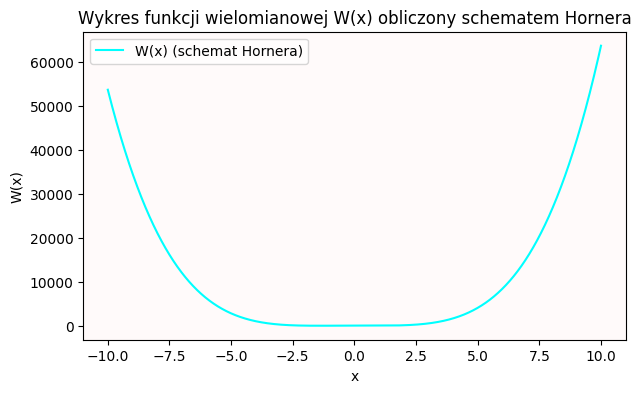

         843403 function calls (836394 primitive calls) in 1.467 seconds

   Ordered by: standard name

   ncalls  tottime  percall  cumtime  percall filename:lineno(function)
        1    0.000    0.000    0.011    0.011 964347259.py:10(obliczenia_horner)
        1    0.010    0.010    0.010    0.010 964347259.py:2(W_horner)
        1    0.424    0.424    0.832    0.832 964347259.py:20(zapisywanie_do_pliku_horner)
        1    0.000    0.000    0.623    0.623 964347259.py:25(rysuj_wykres_horner)
       20    0.000    0.000    0.000    0.000 <frozen _collections_abc>:778(__contains__)
       10    0.000    0.000    0.000    0.000 <frozen _collections_abc>:794(values)
       10    0.000    0.000    0.000    0.000 <frozen _collections_abc>:812(__init__)
        9    0.000    0.000    0.000    0.000 <frozen _collections_abc>:815(__len__)
       50    0.000    0.000    0.000    0.000 <frozen _collections_abc>:878(__iter__)
      441    0.000    0.000    0.001    0.000 <frozen abc>:117(__in

In [12]:
# Funkcja W_horner(x_wartosci) implementuje schemat Hornera do obliczenia wartości wielomianu
def W_horner(x_wartosci):
    a = np.array([6, 5, -13, 1, 1])  # Współczynniki wielomianu
    result = a[0] * np.ones_like(x_wartosci)  
    # Schemat Hornera: iteracyjnie przetwarzamy każdy współczynnik
    for coefficient in a[1:]:
        result = result * x_wartosci + coefficient  # Aktualizujemy wynik zgodnie z algorytmem Hornera
    return result  

def obliczenia_horner():
    start_time = time.time()  
    x_wartosci = np.arange(-10, 10, 0.0001) 
    w_wartosci = W_horner(x_wartosci)  
    end_time = time.time()  
    czas2 = end_time - start_time  

    print(f"Czas wykonania działania sposobem schematu Hornera: {czas2:.4f} sekundy")
    return x_wartosci, w_wartosci, czas2  

def zapisywanie_do_pliku_horner(x_wartosci, w_wartosci):
    with open("wielomian_wyniki_horner_vec.txt", "w") as file:
        for x, w in zip(x_wartosci, w_wartosci):
            file.write(f'W({x:.4f}) = {w:.4f}\n')  

def rysuj_wykres_horner(x_wartosci, w_wartosci):
    plt.figure(figsize=(7, 4))  
    plt.plot(x_wartosci, w_wartosci, label="W(x) (schemat Hornera)", color="cyan")
    plt.title("Wykres funkcji wielomianowej W(x) obliczony schematem Hornera")
    plt.xlabel("x")
    plt.ylabel("W(x)")
    plt.gca().set_facecolor('snow') 
    plt.legend()
    plt.show()  

def profile_program():
    profiler = cProfile.Profile()
    profiler.enable()

    x_wartosci, w_wartosci, czas2 = obliczenia_horner()
    zapisywanie_do_pliku_horner(x_wartosci, w_wartosci)
    rysuj_wykres_horner(x_wartosci, w_wartosci)

    profiler.disable()

    profiler.print_stats()

profile_program()
